# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For the second project in the Udacity Data Analyst nanodegree, I picked the Kaggle data set (curated by Udacity) named 'No-shows at Brazil medical appointments', which contains over 110,500 appointment records, with information ranging from the neighborhood of the hospital, whether or not they are enrolled in a government aid program, whether they have been diagnosed with hypertension, alcoholism, etc., with the final column denoting whether or not they showed up for their appointment.

For this analysis, I picked the questions:<br>
_**1. What does the 'Gender' column tell us about the data set?**_<br>
_**2. How much do the health condition diagnoses provided in the dataset affect a patient's willigness to show up to an appointment?**_

For the purposes of this analysis, I considered all 4 conditions (hypertension, diabetes, alcoholism, and physical handicap) as illnesses.

I used the following Python libraries in this analysis:

In [2]:
# Import statements for the packages to be used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load data and print out the head
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Getting a summary of the dataframe record number and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Description of the dataframe values
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# Verifying whether the 'Handicap' column should actually have max value of 4
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

It looked like the values in this column meant something that had not been disclosed in the dataset notes (e.g. different levels of handicap). Without further insight into the meaning of the numbers and to keep the analysis at a high-enough level, I changed the positive values to '1' in the Data Cleaning section below in order to denote when an individual was handicapped.

In [5]:
# Checking for duplicate values
sum(df.duplicated())

0

### Initial thoughts and list of wrangling steps to take

On the overall, the dataset required very minimal cleaning and wrangling. There were no duplicate values to handle, and the number of records was the same throughout all the columns. I took the following data cleaning and wrangling steps to make the analysis easier:

1. Since I did not use the neighbourhood information in our analysis, I dropped that column.
2. I converted all column names to snake case.
3. I renamed the following columns:
  1. 'Hipertension': 'hypertensive'
  2. 'Diabetes': 'diabetic'
  3. 'Alcoholism': 'alcoholic'
  4. 'Handcap': 'handicapped'
4. I made the following column type conversions:
  1. ScheduledDay, AppointmentDay = DateTime. Although this type conversion was not necessarily required for my analysis, doing this will help to make the file easier to analyze in the future. 
  2. PatientId = Integer
5. I converted 'No-show' to binary (0 to denote 'No' and 1 to denote 'Yes') for ease of use.
6. Since age cannot be negative or zero (also to make the analysis generally applicable), I excluded anyone above 100 years of age.
7. I changed the 2, 3, 4 in 'handicapped' column to '1'.

### Data Cleaning

All of the data cleaning in the cells below is followed by statements to ensure that the change took place.

I started by removing the 'Neighbourhood' column:

In [4]:
# Drop the 'neighborhood column'
df.drop('Neighbourhood', axis=1, inplace=True)

# Confirm that the column has been dropped
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

Then, I changed the column names to snake case and renamed 3 columns (note point 3 in the above section)

In [5]:
# Rename columns and change to snake case

df.rename(columns={'PatientId':'patient_id',
                   'AppointmentID':'appointment_id',
                   'Gender':'gender',
                   'ScheduledDay':'scheduled_day',
                   'AppointmentDay':'appointment_day',
                   'Age':'age',
                   'Scholarship':'scholarship',
                   'Hipertension':'hypertensive',
                   'Diabetes':'diabetic',
                   'Alcoholism':'alcoholic',
                   'Handcap':'handicapped',
                   'SMS_received':'sms_received',
                   'No-show':'no_show'}, inplace=True)

# Check that it worked
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'scholarship', 'hypertensive', 'diabetic',
       'alcoholic', 'handicapped', 'sms_received', 'no_show'],
      dtype='object')

Next, I converted the no_show column to binary, with 0 denoting 'No' and 1 denoting 'Yes'.

In [6]:
# Change the 'No' and 'Yes' in 'no_show' to 0 and 1 respectively
df['no_show'].replace({'No':0,'Yes':1},inplace=True)

# Confirm the change
df.no_show.value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

I made a similar change to the df.handicapped column; however, since I was changing a number of values in this case, I chose to use a lambda function

In [7]:
# Change df.handicapped to binary (0 if 'False' and '1' if True)
df.handicapped = df.handicapped.apply(lambda x: 1 if x > 0 else 0)
df.handicapped.value_counts()

0    108286
1      2241
Name: handicapped, dtype: int64

Following that, I made the type conversions as noted above:

In [8]:
# Convert scheduled_day and appointment_day to DateTime

df['scheduled_day'] = pd.to_datetime(df.scheduled_day)
df['appointment_day'] = pd.to_datetime(df.appointment_day)

# Convert PatientId to Integer
df['patient_id'] = df.patient_id.astype('int64')

# Convert no_show to Integer
df['no_show'] = df.no_show.astype('int64')

# Confirm column types change
df.dtypes

patient_id                  int64
appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
scholarship                 int64
hypertensive                int64
diabetic                    int64
alcoholic                   int64
handicapped                 int64
sms_received                int64
no_show                     int64
dtype: object

Next, I wanted to see how many values the dataset had of age < 1

In [9]:
# Count the number of records that have age < 1
df_age_under_1 = df.query('age < 1').count()
df_age_under_1

patient_id         3540
appointment_id     3540
gender             3540
scheduled_day      3540
appointment_day    3540
age                3540
scholarship        3540
hypertensive       3540
diabetic           3540
alcoholic          3540
handicapped        3540
sms_received       3540
no_show            3540
dtype: int64

Even though this was not a nontrivial number of records, these records would affect the findings and applicability of the analysis. They may have been erroneous entries or held a different meaning to the individual recording the data. I removed them from the data set as follows:

In [10]:
df = df.drop(df[df.age < 1].index)

# Confirm that it worked
df.query('age < 1').count()


patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
scholarship        0
hypertensive       0
diabetic           0
alcoholic          0
handicapped        0
sms_received       0
no_show            0
dtype: int64

Similarly, I counted the number of records where the age is above 100 and remove those as well.

In [13]:
# Count the number of records that have age > 100
df_age_over_100 = df.query('age > 100').count()
df_age_over_100

patient_id         7
appointment_id     7
gender             7
scheduled_day      7
appointment_day    7
age                7
scholarship        7
hypertensive       7
diabetic           7
alcoholic          7
handicapped        7
sms_received       7
no_show            7
dtype: int64

In [11]:
# Drop records where age > 100
df = df.drop(df[df.age > 100].index) #http://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/

# Confirm that it worked
df.query('age > 100').count()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
scholarship        0
hypertensive       0
diabetic           0
alcoholic          0
handicapped        0
sms_received       0
no_show            0
dtype: int64

Finally, I created a column that counted the number of health conditions each patient was diagnosed with. This would later help me with analyzing effects of multiple diagnoses on the patient's willingness/ability to show up to their doctor's appointment.

In [12]:
# Create a column to count the number of illnesses per patient
df['num_of_diseases'] = 0
df.num_of_diseases = df.apply(lambda x: x.hypertensive + x.diabetic + x.handicapped + x.alcoholic, axis = 1)

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1. What does the 'Gender' column tell us about the data set?

First, I got a value count of the gender make-up of the dataset

In [13]:
males = df.query('gender == "M"')
females = df.query('gender == "F"')

males_count = males.gender.count()
females_count = females.gender.count()

In order to get a picture of the percentage of the dataset that is females vs. that is male, I plotted a pie chart as follows:

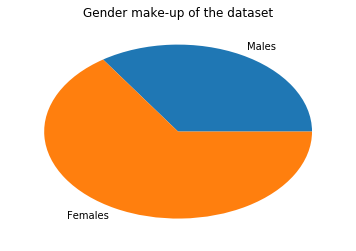

In [14]:
# Plotting the pie chart
gender_counts = [males_count, females_count]
gender_names = ['Males','Females']

plt.pie(gender_counts, labels = gender_names)
plt.title('Gender make-up of the dataset');

Nearly 66% of the dataset consists of female patients, and a litte over 33% of it consists of males. This may have implications on the insights uncovered in the next question: since the data mostly contains records about female patients, the trends may be skewed by gender, and leading from that, the recommendations made may not be generally applicable to all patients.

Further questions could be developed for root cause or multi-variate analysis on this information uncovered: For example, Are more women sick than men in Brazil? Or, do more women tend to setup appointments when they feel ill?

### Question 2. How much do health conditions affect a patient's willigness to show up to an appointment?


I started the analysis at the highest level, comparing no_show between patients without any illnesses and with at least 1 illness. I queried the dataset for patients with those characteristics, and then plotted their proportions on a bar chart. I chose to use proportions of no_show in order to offset the difference in the number of records between those queries.

In [16]:
# Querying to subset df with no illnesses and with at least 1 illness
df_no_illness = df.query('num_of_diseases == 0')
df_ill = df.query('num_of_diseases > 0')

In [17]:
# Getting proportions of patients that were no-shows within their subsets (divide no_show count by the total number in the respective subset)
no_ill_no_show = df_no_illness.no_show.sum()
ill_no_show = df_ill.no_show.sum()

no_ill_no_show_prop = no_ill_no_show/df_no_illness.no_show.count()
ill_no_show_prop = ill_no_show/df_ill.no_show.count()

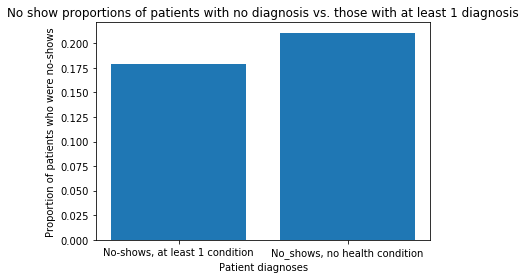

In [18]:
#plot comparing no_ill_no_show_prop and ill_no_show_prop
plt.bar(["No_shows, no health condition", "No-shows, at least 1 condition"], [no_ill_no_show_prop, ill_no_show_prop])
plt.title("No show proportions of patients with no diagnosis vs. those with at least 1 diagnosis")
plt.xlabel("Patient diagnoses")
plt.ylabel("Proportion of patients who were no-shows");

As the graph shows, patients who are either alcoholic, hypertensive, diabetic, or handicapped are more likely to show up to doctor appointments. That makes sense, as those patients are  generally more concerned with their well-being and possibly have a better relationship with their doctor, whereas non-diagnosed patients are more likely to blow off doctor appointments for other commitments.

Next, I looked at whether having multiple or just 1 diagnosis affects a patient's willingness to show up at a doctor's appointment. I used the same method of obtaining those queries and plotting the analysis. 

In [21]:
# Query for num_of_diseases == 1 and > 1
one_disease = df.query('num_of_diseases == 1')
two_diseases = df.query('num_of_diseases == 2')
three_diseases = df.query('num_of_diseases == 3')
four_diseases = df.query('num_of_diseases == 4')

I wanted to ensure that we were comparing a representative number of records between the diagnosis counts, so I checked the number of values with each disease.

In [22]:
# Number of records with their disease counts
df.num_of_diseases.value_counts()

0    80574
1    18117
2     7658
3      618
4       13
Name: num_of_diseases, dtype: int64

I would suggest at this point to gather more data on patients with 3 and 4 diagnoses to make the analysis more representative of the population, as there is very limited data available on those patients. I also used proportions in this case.

In [23]:
# Proportions of all no_shows within their subsets (divide no_show count by the total number in the respective subset)
one_disease_no_show = one_disease.no_show.sum()
two_diseases_no_show = two_diseases.no_show.sum()
three_diseases_no_show = three_diseases.no_show.sum()
four_diseases_no_show = four_diseases.no_show.sum()


one_disease_no_show_prop = one_disease_no_show/one_disease.no_show.count()
two_diseases_no_show_prop = two_diseases_no_show/two_diseases.no_show.count()
three_diseases_no_show_prop = three_diseases_no_show/three_diseases.no_show.count()
four_diseases_no_show_prop = four_diseases_no_show/four_diseases.no_show.count()

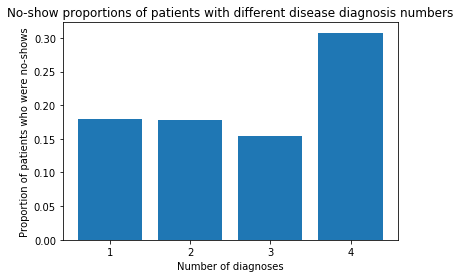

In [24]:
#plot comparing number of no-show patients with 1 disease vs number of no-show patients with at least 2 diseases 
plt.bar(["1", "2", "3", "4"], [one_disease_no_show_prop, two_diseases_no_show_prop, three_diseases_no_show_prop, four_diseases_no_show_prop])
plt.title("No-show proportions of patients with different disease diagnosis numbers")
plt.xlabel("Number of diagnoses")
plt.ylabel("Proportion of patients who were no-shows");

From this graph, it appears that the more health conditions a patient is diagnosed with, the more likely they are to show up to their doctor's appointment with the exception of when they have all 4 conditions diagnosed. Further research into this phenomenon would need input from someone with more domain expertise in the diagnoses data provided. 

We will now look at which diagnosis prompts the most patients to show up to their doctor's appointments. To do this, we will query the data for records where each health condition is true. Even though there will be some overlap (since there are patients who have 2, 3, and 4 diagnoses), we are looking for correlation between each disease type and their willingness to show up to a doctor's appointment.

In [25]:
# Querying data for each diagnosis = true
hypertensive = df.query('hypertensive == 1')
diabetic = df.query('diabetic == 1')
alcoholic = df.query('alcoholic == 1')
handicapped = df.query('handicapped == 1')

In [26]:
# Proportions of all no_shows within their subsets (divide no_show count by the total number in the respective subset)
hypertensive_no_show = hypertensive.no_show.sum()
diabetic_no_show = diabetic.no_show.sum()
alcoholic_no_show = alcoholic.no_show.sum()
handicapped_no_show = handicapped.no_show.sum()

hypertensive_no_show_prop = hypertensive_no_show/hypertensive.no_show.count()
diabetic_no_show_prop = diabetic_no_show/diabetic.no_show.count()
alcoholic_no_show_prop = alcoholic_no_show/alcoholic.no_show.count()
handicapped_no_show_prop = handicapped_no_show/handicapped.no_show.count()

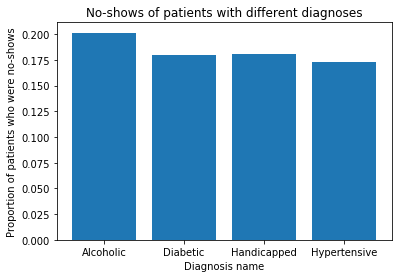

In [27]:
#plot comparing number of no-show patients with each disease type 
plt.bar(["Hypertensive", "Diabetic", "Alcoholic", "Handicapped"], [hypertensive_no_show_prop, diabetic_no_show_prop, alcoholic_no_show_prop, handicapped_no_show_prop])
plt.title("No-shows of patients with different diagnoses")
plt.xlabel("Diagnosis name")
plt.ylabel("Proportion of patients who were no-shows");

Based on this bar graph, it appears that alcoholic patients tend to be the most no-shows for their appointments.

One final analysis we want to do is find out the proportion of patients with just one disease and their no-show counts.

In [28]:
# Subset patients with just 1 disease, then get all the no-shows. Then compare each disease type. Put in pie
one_disease = df.query('num_of_diseases == 1')

In [29]:
# Taking subsets of the one_disease dataframe for each disease
one_hypertensive = one_disease.query('hypertensive == 1')
one_diabetic = one_disease.query('diabetic == 1')
one_alcoholic = one_disease.query('alcoholic == 1')
one_handicapped = one_disease.query('handicapped == 1')

In [30]:
# no_show proportions for each of the one_disease subsets
one_disease_no_show_sum = one_hypertensive.no_show.sum() + one_diabetic.no_show.sum() + one_alcoholic.no_show.sum() + one_handicapped.no_show.sum()
one_hypertensive_no_show_prop = one_hypertensive.no_show.sum()/one_disease_no_show_sum
one_diabetic_no_show_prop = one_diabetic.no_show.sum()/one_disease_no_show_sum
one_alcoholic_no_show_prop = one_alcoholic.no_show.sum()/one_disease_no_show_sum
one_handicapped_no_show_prop = one_handicapped.no_show.sum()/one_disease_no_show_sum

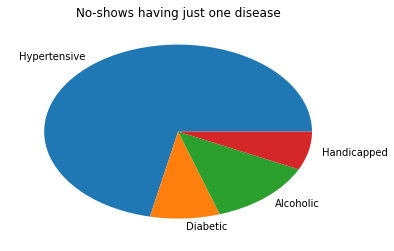

In [31]:
# Plotting the pie chart
one_disease_no_show_props = [one_hypertensive_no_show_prop, one_diabetic_no_show_prop, one_alcoholic_no_show_prop, one_handicapped_no_show_prop]
disease_names = ['Hypertensive', 'Diabetic', 'Alcoholic', 'Handicapped']

plt.pie(one_disease_no_show_props, labels = disease_names)
plt.title('No-shows having just one disease');

From this comparison, we can see that hypertensive patients are the most likely to miss their appointments as compared with the rest of the diagnoses.

<a id='conclusions'></a>
## Limitations and Conclusions

Some limitations of this analysis are:

1. The data set contains more records about female patients, therefore there is a high chance that conclusions in this section and the recommendations that would follow such an analysis would be skewed towards female patients.
2. The data set also has a very small number of records where the patients have all 4 diagnoses. To some degree, that explains why the proportion of no-shows is high (near 30%) for patients with all 4 diagnoses. I would suggest gathering more data about these patients to ensure that the sample data is representative of the population.
3. I had to remove a number of records from the data because of ages below 1 and above 100. More research into whether these records were genuine (and their inclusion in the analysis) might lead to interesting findings and future research into problems faced by those patients in showing up to their doctor's appointments.
4. Having information about other health diagnoses will provide a fuller picture of the impact of health conditions on a patient's ability to meet their doctor.

Despite those limitations, I was able to make some tentative conclusions from the data. Considering that this data was explored only at a high level, and the question posed was tackled mostly in isolation, the findings are tentative and would require more robust analysis using machine learning algorithms and statistical analysis:

1. Patients with no diagnoses are more likely to miss their doctor's appointments than patients with at least one diagnosis.
2. Patients who are diagnosed with alcoholism tend to miss their appointments more than with other diagnoses.
3. Within patients with just one diagnosis, hypertension is the most correlated with patients missing their appointments compared to the other diagnoses.

Additional research is needed into why having all 4 diagnoses leads to nearly double the appointment no-shows than having either 1, 2, or 3 diagnoses.

In [15]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0